In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from figure_utils import journal_figure, nanmad
import stats as my_stats

In [ ]:
model_list = ["alexnet_relu", "convnext", "convnext_ssl", "resnet18", "resnet18_robust", "resnet18_ssl", "resnet", "resnet_ssl", "resnet_swsl", "resnetSIN", "resnet152_2", "resnet101", "resnet101_ssl", "resnet_robust_eps1", "resnet_robust_eps3", "inception", "inceptionv1", "vit", "vit_ssl", "vgg16", "vgg16_robust", "densenet", "densenet169", "densenet161", "densenet161_robust", "densenet121", "mobilenet", "mobilenet_v2", "mobilenet_robust", "squeezenet", "cornetS_t0", "cornetS_reg", "cornetS_reg2", "cornetRT_t4", "nasnet", "pnasnet", "swin", "swin_ssl", "shufflenet", "shufflenet_robust"]


In [19]:
ev_forward_m = []
ev_forward_mad = []
for model in model_list:
    out_dir = f'./results_predictions/model2monkey/{model}/'
    for monkey in ["m1", "m2"]:
        ev_per_neuron = np.load(os.path.join(out_dir, f'ev_{monkey}.npy'))
        ev_forward_m.append(np.nanmean(ev_per_neuron))
        ev_forward_mad.append(nanmad(ev_per_neuron))
        

In [20]:
ev_reversed_m = []
ev_reversed_mad = []
for model in model_list:
    for monkey in ["m1", "m2"]:
        ev_per_neuron = np.load(f'./results_predictions/monkey2model/{monkey}/ev_{model}.npy')
        ev_reversed_m.append(np.nanmean(ev_per_neuron))
        ev_reversed_mad.append(nanmad(ev_per_neuron))
        

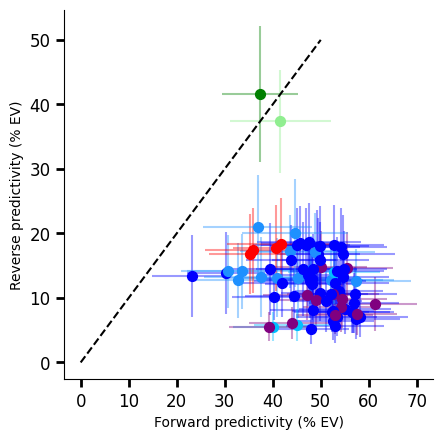

In [21]:
i=0
for m, model in enumerate(model_list):
    if "robust" in model:
        color="dodgerblue"
    elif "ssl" in model:
        color="purple"
    elif model == "vit" or model=="swin":
        color="deepskyblue"
    elif "reg" in model:
        color="red"
    else:
        color="blue"
    for monkey in ["m1", "m2"]:
        plt.errorbar(ev_forward_m[i], ev_reversed_m[i], xerr=ev_forward_mad[i], yerr=ev_reversed_mad[i], alpha=0.4, color=color, zorder=5) #colors[m])
        plt.scatter(ev_forward_m[i], ev_reversed_m[i], 50, color=color, label=model if monkey=="m1" else None, zorder=15)
        i += 1


m2_to_m1 = np.load("./results_predictions/monkey2monkey/ev_m2_to_m1.npy")
m1_to_m2 = np.load("./results_predictions/monkey2monkey/ev_m1_to_m2.npy")

plt.scatter(m2_to_m1.mean(), m1_to_m2.mean(), 50, marker="o", color="green")
plt.scatter(m1_to_m2.mean(), m2_to_m1.mean(), 50, marker="o", color="lightgreen")
plt.errorbar(m2_to_m1.mean(), m1_to_m2.mean(), xerr=nanmad(m2_to_m1), yerr=nanmad(m1_to_m2), color="green", alpha=0.4)
plt.errorbar(m1_to_m2.mean(), m2_to_m1.mean(), xerr=nanmad(m1_to_m2), yerr=nanmad(m2_to_m1), color="lightgreen", alpha=0.4)


plt.plot([0,50], [0,50], linestyle='--', color="black")
plt.xlabel("Forward predictivity (% EV)")
plt.ylabel("Reverse predictivity (% EV)")
journal_figure()
plt.show()

In [22]:
my_stats.nancorr(ev_forward_m, ev_reversed_m, "spearman")

r(79) = -0.33, p = 0.002


(np.float64(-0.33415377402719176), np.float64(0.0024511268051968915))

In [26]:
print(np.median(m2_to_m1), nanmad(m2_to_m1))
print(np.median(m1_to_m2), nanmad(m1_to_m2))

35.31513125900698 7.978338961063063
43.249228785273374 10.511971786978656
